Found 1 entry for Rewari:
           GID_2 GID_0 COUNTRY     GID_1   NAME_1 NL_NAME_1  NAME_2 VARNAME_2  \
185  IND.12.17_1   IND   India  IND.12_1  Haryana        NA  Rewari        NA   

    NL_NAME_2    TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
185        NA  District  District   NA  IN.HR.RE   

                                              geometry  
185  POLYGON ((76.66393 28.09785, 76.65799 28.09907...  


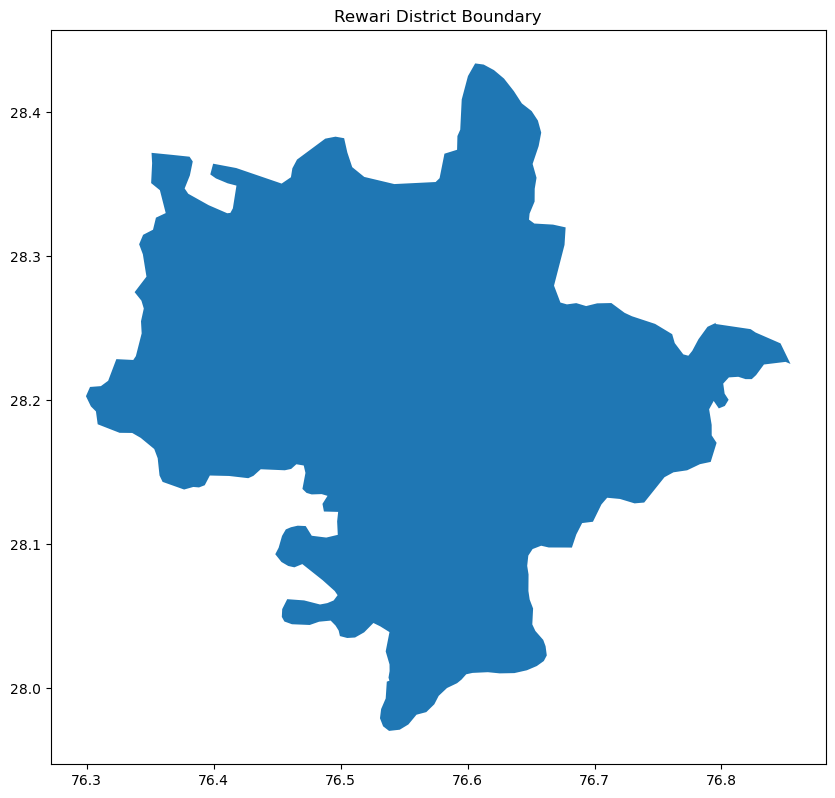


Boundary saved to ../data/rewari_boundary.geojson


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# Make sure this path is correct
SHAPEFILE_PATH = "../data/geospatial/gadm41_IND_2.shp"
DISTRICT_NAME = "Rewari"
# ---

# Load the shapefile containing all districts of India
india_districts = gpd.read_file(SHAPEFILE_PATH)

# Filter the data to get only the Rewari district
rewari_boundary = india_districts[india_districts['NAME_2'] == DISTRICT_NAME]

# --- VERIFICATION ---
# 1. Print the data to see if it was found
print(f"Found {len(rewari_boundary)} entry for {DISTRICT_NAME}:")
print(rewari_boundary)

# 2. Plot the map to visually confirm
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
rewari_boundary.plot(ax=ax)
ax.set_title(f"{DISTRICT_NAME} District Boundary")
plt.show()

# 3. Save the boundary to a more usable format
output_path = f"../data/{DISTRICT_NAME.lower()}_boundary.geojson"
rewari_boundary.to_file(output_path, driver='GeoJSON')
print(f"\nBoundary saved to {output_path}")

Attempting extraction with flavor='stream'...
Success! Camelot found 1 table(s) on page 90 using 'stream'.


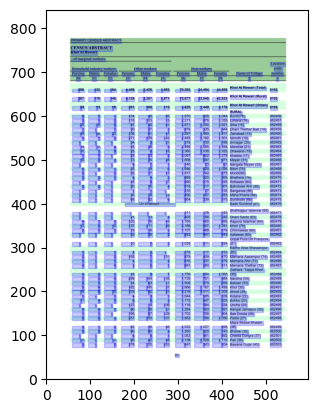


Parsing Report: {'accuracy': 99.78, 'whitespace': 18.74, 'order': 1, 'page': 90}

First 5 rows of the (likely messy) extracted data:


,0,1,2,3,4,5,6,7,8,9,10
0,of marginal workers,,,,,,,,,,
1,,,,,,,,,,,Location
2,,Household industry workers,,,Other workers,,,Non-workers,,,code
3,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Name of Village,number
4,50,51,52,53,54,55,56,57,58,2,1


In [3]:
import camelot
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
PDF_PATH_B = "../data/demographics/rewari_census_handbook_part_B.pdf"
TARGET_PAGE = 90
# ---

print("Attempting extraction with flavor='stream'...")

# --- EXTRACTION ---
# We've switched from 'lattice' to 'stream'
tables = camelot.read_pdf(PDF_PATH_B, 
                          pages=str(TARGET_PAGE), 
                          flavor='stream')

# --- VISUAL DEBUGGING ---
if tables.n > 0:
    print(f"Success! Camelot found {tables.n} table(s) on page {TARGET_PAGE} using 'stream'.")

    # For 'stream', plotting 'text' is very useful. It shows the text blocks it detected.
    fig = camelot.plot(tables[0], kind='text')
    plt.show()

    print("\nParsing Report:", tables[0].parsing_report)
    print("\nFirst 5 rows of the (likely messy) extracted data:")
    display(tables[0].df.head())
else:
    print("\nMission Failed: Even 'stream' could not detect a table on this page.")
    print("This indicates a very complex PDF structure. We may need to try page 118 next.")